### Create DTM with CountVectorizer for topic modeling:

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import time, warnings, pickle
import re, nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

%matplotlib inline
plt.style.use("seaborn")
pd.options.display.max_colwidth = 120
warnings.filterwarnings("ignore") #,category=DeprecationWarning)

In [2]:
#import dataframe with clean review content
df_clean = pd.read_pickle("data/df_100k_clean.pkl")
df_clean.head(3)

,podcast_id,review_title,content,rating,created_at,category,podcast_title,cont_clean
873185,a9bdaba5449189a4587793e36ce4f704,A True Crime Haiku for you,"We listen closely,\nCases of Murder and Loss\nGoing West : True Crime\n\nStella\nPortland, Oregon",5,2019-10-10T15:19:20-07:00,society-culture,Going West: True Crime,we listen closely case of murder and loss going west true crime stella portland oregon
694914,c699968fd592a60c3ba7333d530907d7,Engaging in my 60's,"Love Adam & Brooke! So true, the generations change, but they do recycle. I love the banter and found the discussion...",5,2018-12-31T04:22:13-07:00,comedy,"Thirty, Flirty, & Dying",love adam brooke so true the generation change but they do recycle i love the banter and found the discussion of bel...
759771,dcfb90baae108f9938fd3a762b810cc3,Highly recommend!,"Holly and her guests share inspiring and actionable lessons on how to succeed as a leader in business, HR, and life....",5,2017-09-11T07:05:53-07:00,business,Nine To Thrive HR,holly and her guest share inspiring and actionable lesson on how to succeed a a leader in business hr and life highl...


In [4]:
#check reviews with low rating and also podcasts with low number of reviews 
counts = df_clean["podcast_title"].value_counts().reset_index()
counts[counts["podcast_title"] == 1].shape

(9885, 2)

In [5]:
df_clean[df_clean["podcast_title"] == "Sit, Breathe, Bow"].content

360085    Such a great zen podcast. I have learned so much. Thank Ian and Kwan Um for the providing this!
Name: content, dtype: object

### Topic modeling with NMF with all text, CountVectorizer:

In [6]:
#create document term matrix from the clean reviews
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words="english")
dtm = cv.fit_transform(df_clean["cont_clean"])
dtm

<107445x30158 sparse matrix of type '<class 'numpy.int64'>'
	with 1897399 stored elements in Compressed Sparse Row format>

In [14]:
def topics_nmf(cv, dtm, topic=2):
    """Performs topic modeling with non-negative matrix factorization with a document term matrix.
       Parameters: 
       (1) cv = vectorizer
       (2) dmt = document term matrix
       (3) topic = number of topics
       Returns: Top ten words associate with each topic.
    """
    nmf = NMF(topic)
    doc_topic = nmf.fit_transform(dtm)
    
    words = cv.get_feature_names()
    t = nmf.components_.argsort(axis=1)[:, -1:-11:-1]
    topic_words = [[words[e] for e in l] for l in t]
    
    for i in range(len(topic_words)):
        print(f"Topic {i+1}:", "\n", topic_words[i], "\n")
        
    return nmf, doc_topic, words

In [12]:
topics_nmf(cv, dtm, topic=2)

Topic 1: 
 ['podcast', 'love', 'episode', 'great', 'like', 'wa', 'listen', 'just', 'im', 'listening'] 

Topic 2: 
 ['yes', 'like', 'wa', 'just', 'say', 'think', 'people', 'know', 'dont', 'review'] 



In [13]:
topics_nmf(cv, dtm, topic=4)

Topic 1: 
 ['episode', 'wa', 'like', 'just', 'im', 'time', 'listen', 'listening', 'really', 'great'] 

Topic 2: 
 ['yes', 'say', 'think', 'review', 'thats', 'people', 'know', 'woman', 'omg', 'want'] 

Topic 3: 
 ['love', 'guy', 'listening', 'make', 'story', 'super', 'just', 'im', 'work', 'absolutely'] 

Topic 4: 
 ['podcast', 'great', 'listen', 'ha', 'best', 'listening', 'host', 'ive', 'new', 'guest'] 



In [14]:
topics_nmf(cv, dtm, topic=6)

Topic 1: 
 ['like', 'wa', 'just', 'im', 'time', 'really', 'dont', 'listening', 'people', 'ha'] 

Topic 2: 
 ['yes', 'say', 'think', 'review', 'thats', 'omg', 'woman', 'believe', 'long', 'let'] 

Topic 3: 
 ['love', 'guy', 'listening', 'make', 'story', 'super', 'just', 'im', 'work', 'absolutely'] 

Topic 4: 
 ['podcast', 'listen', 'ha', 'best', 'listening', 'ive', 'thank', 'favorite', 'new', 'life'] 

Topic 5: 
 ['great', 'work', 'guest', 'listen', 'guy', 'job', 'host', 'really', 'podcasts', 'story'] 

Topic 6: 
 ['episode', 'new', 'listen', 'listening', 'listened', 'forward', 'ive', 'im', 'look', 'wait'] 



### NMF topic modeing with all text, TF-IDF:

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tf_idf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")
dtm_tfidf = tf_idf.fit_transform(df_clean["cont_clean"])
dtm_tfidf

<107445x30158 sparse matrix of type '<class 'numpy.float64'>'
	with 1897399 stored elements in Compressed Sparse Row format>

In [17]:
topics_nmf(tf_idf, dtm_tfidf, topic=2)

Topic 1: 
 ['podcast', 'great', 'listen', 'episode', 'like', 'really', 'just', 'im', 'listening', 'good'] 

Topic 2: 
 ['love', 'podcast', 'guy', 'listening', 'absolutely', 'amazing', 'story', 'funny', 'awesome', 'hilarious'] 



In [18]:
topics_nmf(tf_idf, dtm_tfidf, topic=4)

Topic 1: 
 ['episode', 'like', 'im', 'just', 'listening', 'really', 'wa', 'listen', 'good', 'time'] 

Topic 2: 
 ['love', 'guy', 'listening', 'absolutely', 'story', 'funny', 'work', 'podcast', 'hearing', 'yall'] 

Topic 3: 
 ['great', 'work', 'guest', 'job', 'guy', 'content', 'host', 'topic', 'information', 'interview'] 

Topic 4: 
 ['podcast', 'best', 'favorite', 'listen', 'amazing', 'awesome', 'recommend', 'informative', 'highly', 'entertaining'] 



In [19]:
topics_nmf(tf_idf, dtm_tfidf, topic=6)

Topic 1: 
 ['like', 'just', 'im', 'really', 'listening', 'wa', 'life', 'time', 'ha', 'feel'] 

Topic 2: 
 ['love', 'listening', 'absolutely', 'guy', 'story', 'funny', 'hearing', 'podcast', 'yall', 'lady'] 

Topic 3: 
 ['great', 'guest', 'content', 'job', 'host', 'work', 'topic', 'information', 'interview', 'interesting'] 

Topic 4: 
 ['podcast', 'best', 'favorite', 'amazing', 'awesome', 'recommend', 'new', 'highly', 'informative', 'ha'] 

Topic 5: 
 ['episode', 'forward', 'look', 'new', 'wait', 'week', 'looking', 'listened', 'wa', 'ive'] 

Topic 6: 
 ['listen', 'good', 'guy', 'work', 'fun', 'funny', 'entertaining', 'day', 'podcasts', 'awesome'] 



### Tag parts of speech and pull out nouns:

In [3]:
from nltk import pos_tag, word_tokenize

In [21]:
#the different tags for parts of speech
#nltk.help.upenn_tagset()

In [22]:
df_clean[["cont_clean"]].head()

,cont_clean
873185,we listen closely case of murder and loss going west true crime stella portland oregon
694914,love adam brooke so true the generation change but they do recycle i love the banter and found the discussion of bel...
759771,holly and her guest share inspiring and actionable lesson on how to succeed a a leader in business hr and life highl...
532244,i think that anyone who is looking for a perspective into the life and opinion of christian of all walk of life have...
427706,people act like the disclaimer wa so annoying it not that serious i love the podcast


In [23]:
#tokenize the clean review
text_tagged = pd.DataFrame(df_clean["cont_clean"].apply(word_tokenize))

In [24]:
#takes a while to tag parts of speech, save data for future use
start = time.time()
text_tagged["cont_clean"] = text_tagged["cont_clean"].apply(pos_tag)

print(time.time() - start)

158.60732889175415


In [25]:
text_tagged.to_pickle("data/review_tokens_tagged.pkl")

In [4]:
text_tagged = pd.read_pickle("data/review_tokens_tagged.pkl")

In [5]:
def tag_noun(text_noun):
    """Extracts the nouns in a string of text.
       Parameters: string of text
       Returns: string with nouns
    """
    noun = lambda pos: pos[:2] == "NN"
    all_nouns = [word for (word, pos) in text_noun if noun(pos)]
    return " ".join(all_nouns)

In [6]:
#pull out all the nouns
text_tagged["nouns"] = text_tagged["cont_clean"].apply(tag_noun)

In [7]:
text_tagged.head(3)

,cont_clean,nouns
873185,"[(we, PRP), (listen, VBP), (closely, RB), (case, NN), (of, IN), (murder, NN), (and, CC), (loss, NN), (going, VBG), (...",case murder loss crime stella portland oregon
694914,"[(love, VB), (adam, NN), (brooke, NN), (so, RB), (true, JJ), (the, DT), (generation, NN), (change, NN), (but, CC), (...",adam brooke generation change banter discussion bell bottom record player memory discussion mom girl i bell bottom t...
759771,"[(holly, RB), (and, CC), (her, PRP$), (guest, NN), (share, NN), (inspiring, VBG), (and, CC), (actionable, JJ), (less...",guest share lesson leader business hr life hr knowledge mindset team business


###  NMF topic modeling with nouns only, TF-IDF:
- **After the first round of topic modeling: add more stop words and run again (iterative process)**
- **Six topics seem to work the best so far**

In [8]:
#stop words from sklearn.feature_extraction.text is a frozenset containing 318 words
from sklearn.feature_extraction import text
#text.ENGLISH_STOP_WORDS

In [9]:
#adding more stop words to the list of stop words
more_sws = ["podcast", "podcasts", "wa", "thank", "thanks", "way",
            "im", "ive", "ha", "guy", "pod", "people", 
            "wait", "fan", "thing", "stuff", "listen", "listener",
            "listening", "youre", "lot", "dont", "love", "havent",
            "yall", "ton", "word", "talk"]
stop_words = text.ENGLISH_STOP_WORDS.union(more_sws)

In [12]:
tf_idfn = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
dtm_tfidfn = tf_idfn.fit_transform(text_tagged["nouns"])
dtm_tfidfn

<107445x19235 sparse matrix of type '<class 'numpy.float64'>'
	with 721697 stored elements in Compressed Sparse Row format>

In [35]:
topics_nmf(tf_idfn, dtm_tfidfn, topic=2)

Topic 1: 
 ['episode', 'week', 'content', 'season', 'topic', 'year', 'minute', 'friend', 'information', 'review'] 

Topic 2: 
 ['story', 'time', 'work', 'life', 'host', 'day', 'topic', 'week', 'guest', 'content'] 



In [15]:
#topics_nmf(tf_idfn, dtm_tfidfn, topic=6)
nmf, doc_topic, words = topics_nmf(tf_idfn, dtm_tfidfn, topic=6)

Topic 1: 
 ['episode', 'week', 'season', 'year', 'minute', 'month', 'friend', 'review', 'series', 'point'] 

Topic 2: 
 ['time', 'year', 'review', 'friend', 'movie', 'book', 'world', 'information', 'star', 'laugh'] 

Topic 3: 
 ['story', 'voice', 'crime', 'share', 'music', 'job', 'history', 'season', 'woman', 'character'] 

Topic 4: 
 ['work', 'day', 'job', 'home', 'year', 'content', 'commute', 'lady', 'drive', 'review'] 

Topic 5: 
 ['host', 'topic', 'guest', 'fun', 'content', 'conversation', 'information', 'interview', 'job', 'question'] 

Topic 6: 
 ['life', 'week', 'day', 'friend', 'year', 'world', 'business', 'advice', 'woman', 'god'] 



In [40]:
topics_nmf(tf_idfn, dtm_tfidfn, topic=10)

Topic 1: 
 ['episode', 'season', 'year', 'minute', 'friend', 'month', 'review', 'information', 'series', 'point'] 

Topic 2: 
 ['time', 'year', 'review', 'friend', 'movie', 'book', 'world', 'information', 'music', 'star'] 

Topic 3: 
 ['story', 'voice', 'crime', 'share', 'music', 'job', 'history', 'season', 'woman', 'character'] 

Topic 4: 
 ['work', 'job', 'year', 'home', 'lady', 'review', 'drive', 'commute', 'month', 'book'] 

Topic 5: 
 ['host', 'topic', 'guest', 'conversation', 'interview', 'information', 'job', 'question', 'variety', 'discussion'] 

Topic 6: 
 ['life', 'year', 'friend', 'business', 'world', 'advice', 'woman', 'god', 'share', 'information'] 

Topic 7: 
 ['week', 'friend', 'year', 'highlight', 'review', 'hour', 'lady', 'couple', 'movie', 'star'] 

Topic 8: 
 ['day', 'morning', 'year', 'friend', 'hour', 'world', 'voice', 'job', 'laugh', 'commute'] 

Topic 9: 
 ['content', 'quality', 'business', 'voice', 'interview', 'year', 'star', 'ad', 'sound', 'job'] 

Topic 10: 


In [42]:
topics_nmf(tf_idfn, dtm_tfidfn, topic=15)

Topic 1: 
 ['episode', 'season', 'minute', 'month', 'series', 'point', 'idea', 'beginning', 'bit', 'quality'] 

Topic 2: 
 ['time', 'waste', 'laugh', 'minute', 'lady', 'hour', 'car', 'point', 'bit', 'review'] 

Topic 3: 
 ['story', 'voice', 'crime', 'share', 'history', 'job', 'character', 'season', 'teller', 'narrator'] 

Topic 4: 
 ['work', 'job', 'home', 'lady', 'drive', 'commute', 'month', 'crime', 'hour', 'car'] 

Topic 5: 
 ['topic', 'variety', 'perspective', 'discussion', 'range', 'conversation', 'point', 'research', 'opinion', 'view'] 

Topic 6: 
 ['life', 'advice', 'god', 'business', 'woman', 'share', 'experience', 'perspective', 'journey', 'tip'] 

Topic 7: 
 ['week', 'highlight', 'hour', 'lady', 'couple', 'laugh', 'look', 'news', 'commute', 'woman'] 

Topic 8: 
 ['day', 'morning', 'hour', 'commute', 'laugh', 'job', 'home', 'end', 'school', 'lady'] 

Topic 9: 
 ['content', 'quality', 'business', 'voice', 'ad', 'sound', 'production', 'value', 'delivery', 'minute'] 

Topic 10: 


### Visualize topics from NMF:

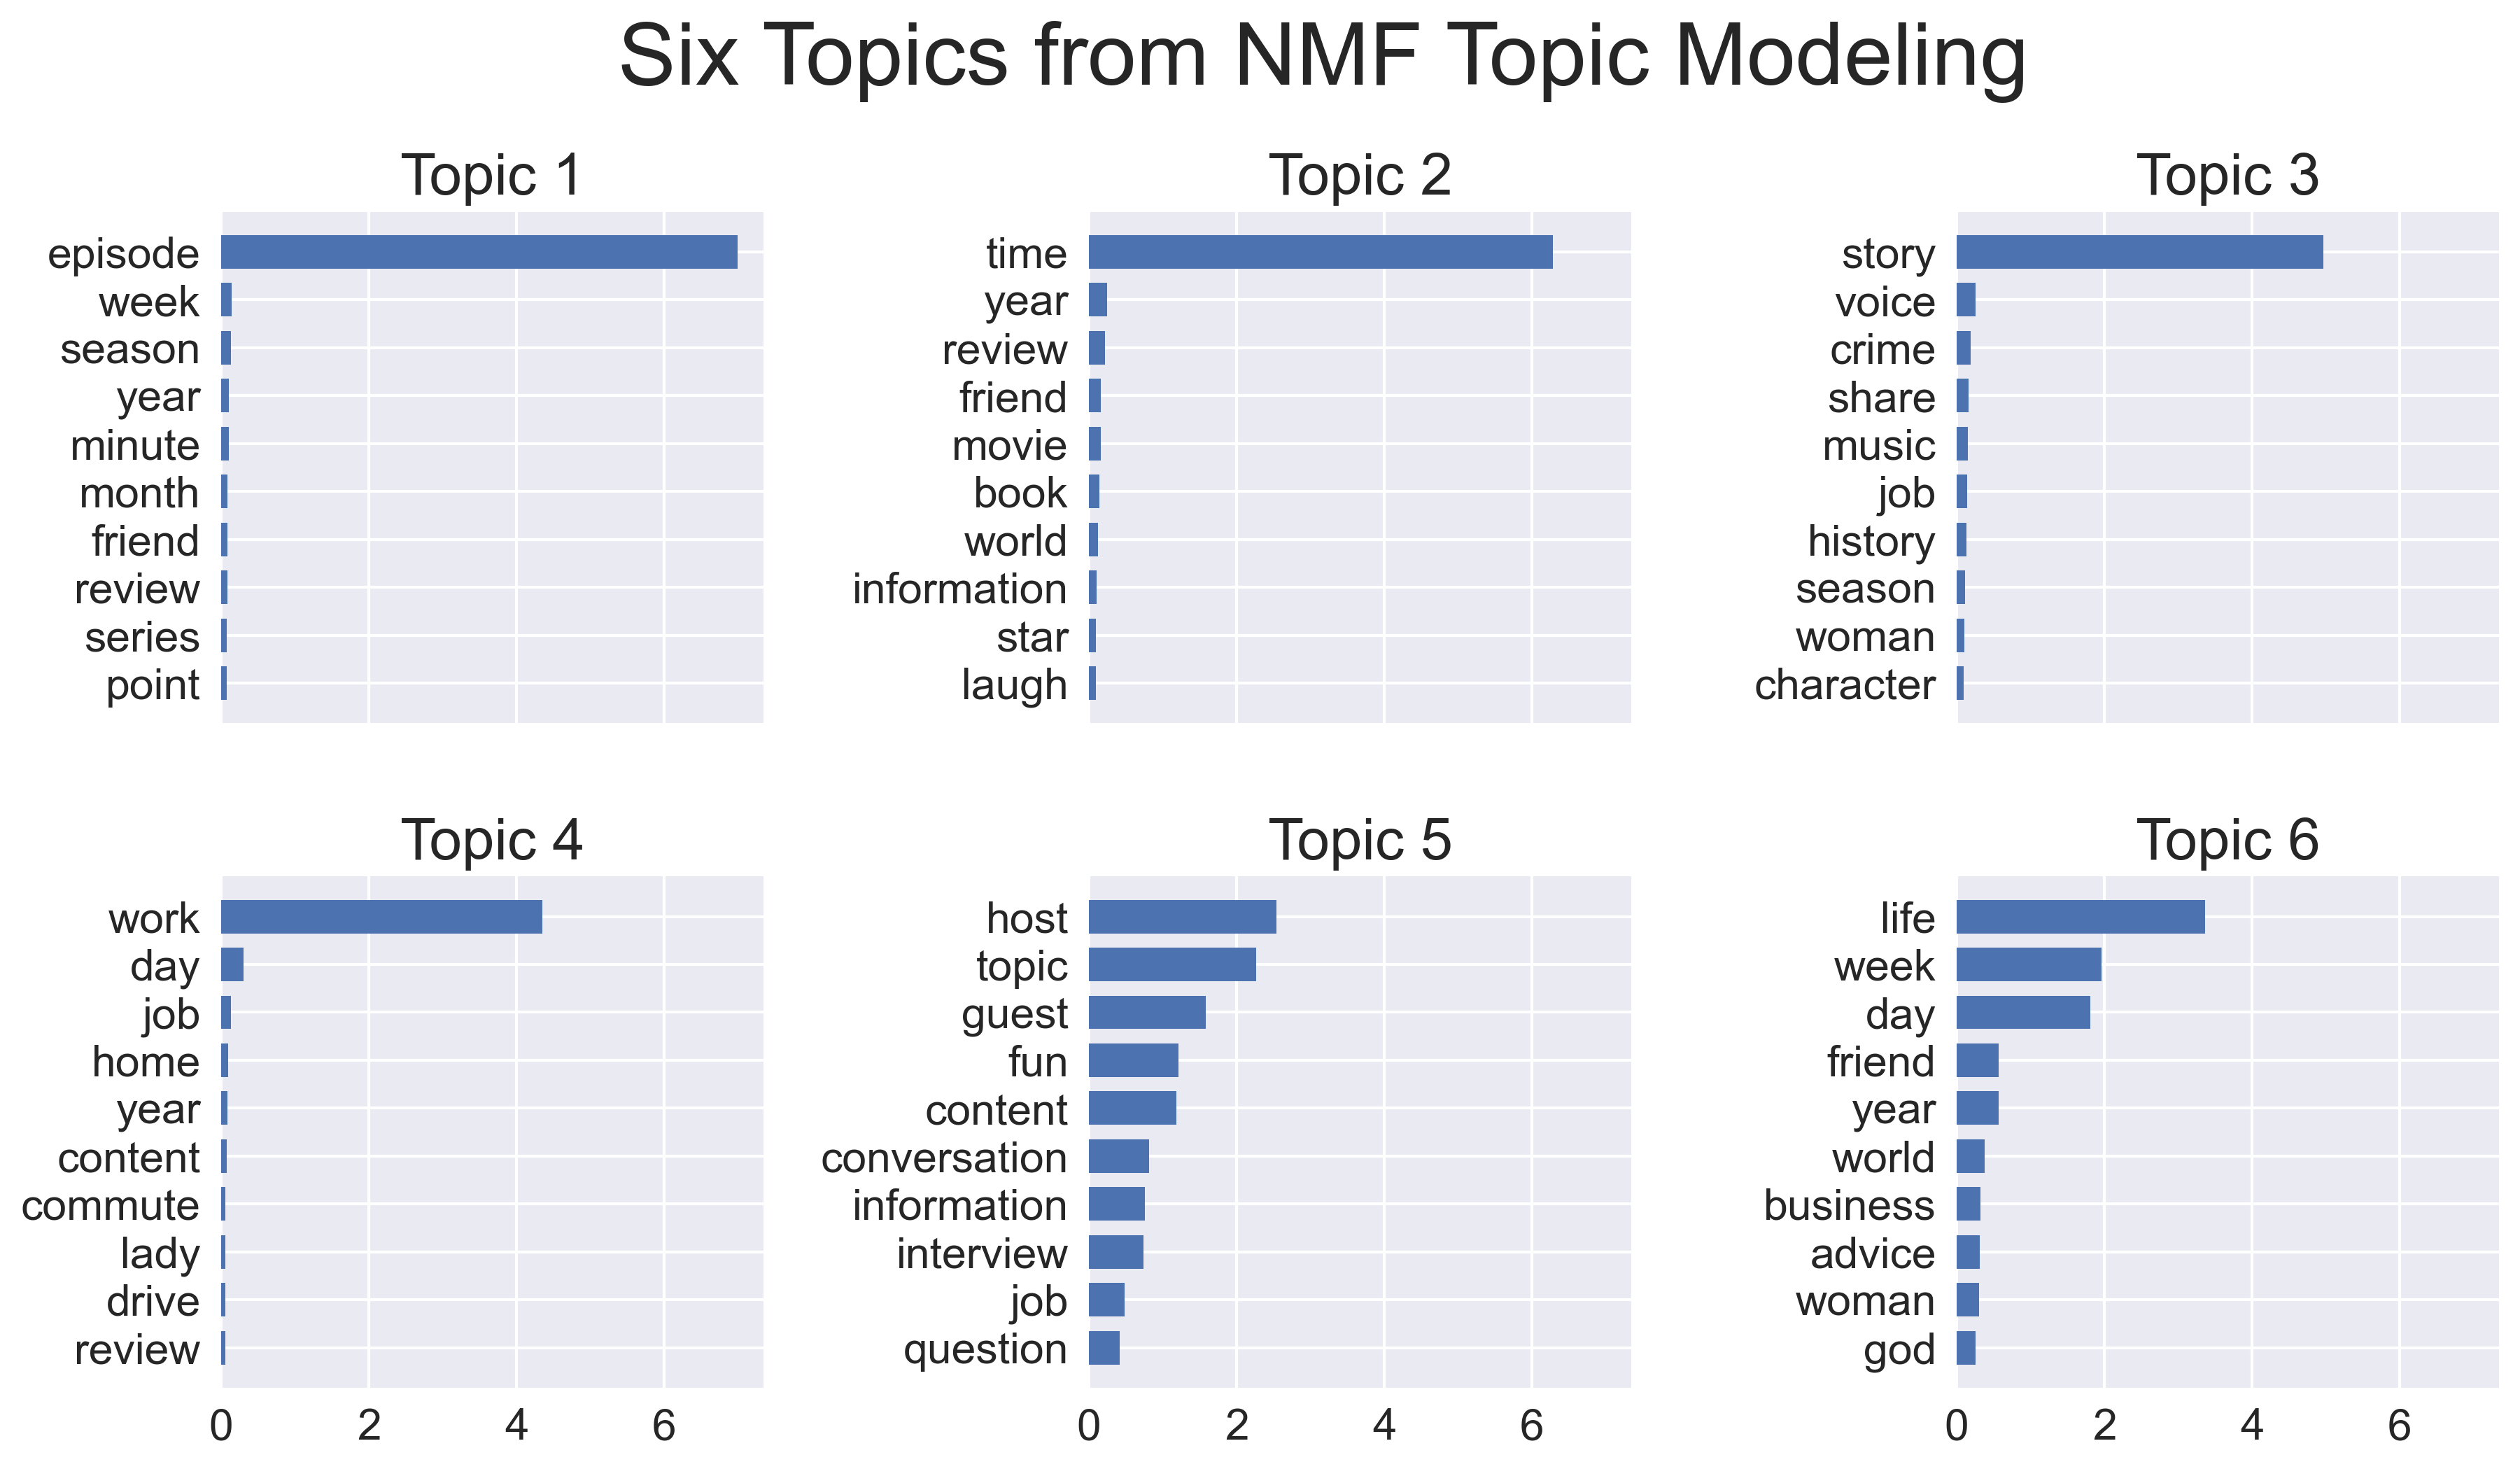

In [16]:
plt.rcParams['figure.dpi'] = 300
fig, axes = plt.subplots(2, 3, figsize=(14, 7), sharex=True)
axes = axes.flatten()

for topic_idx, topic in enumerate(nmf.components_):
    top_features_ind = topic.argsort()[:-10 - 1:-1]
    top_features = [words[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',
                 fontdict={'fontsize': 20})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=15)
    for i in 'top right left'.split():
        ax.spines[i].set_visible(False)
    fig.suptitle("Six Topics from NMF Topic Modeling", fontsize=30)

plt.subplots_adjust(top=0.85, bottom=0.05, wspace=0.6, hspace=0.3);
#plt.savefig("images/topics_NMF_6.svg")

In [17]:
docs_topics = pd.DataFrame(doc_topic.round(4),
                           index=df_clean.index,
                           columns=["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6"])
docs_topics["topic"] = doc_topic.argmax(axis=1)
docs_topics.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic
873185,0.0006,0.0007,0.0028,0.0010,0.0015,0.0011,2
694914,0.0009,0.0012,0.0011,0.0010,0.0085,0.0043,4
759771,0.0000,0.0000,0.0008,0.0000,0.0182,0.0327,5
532244,0.0000,0.0000,0.0000,0.0165,0.0000,0.0901,5
427706,0.0000,0.0000,0.0000,0.0000,0.0001,0.0001,5


In [18]:
docs_count = docs_topics["topic"].value_counts().sort_index().reset_index()
docs_count

,index,topic
0,0,15332
1,1,7371
2,2,7632
3,3,7749
4,4,39128
5,5,30233


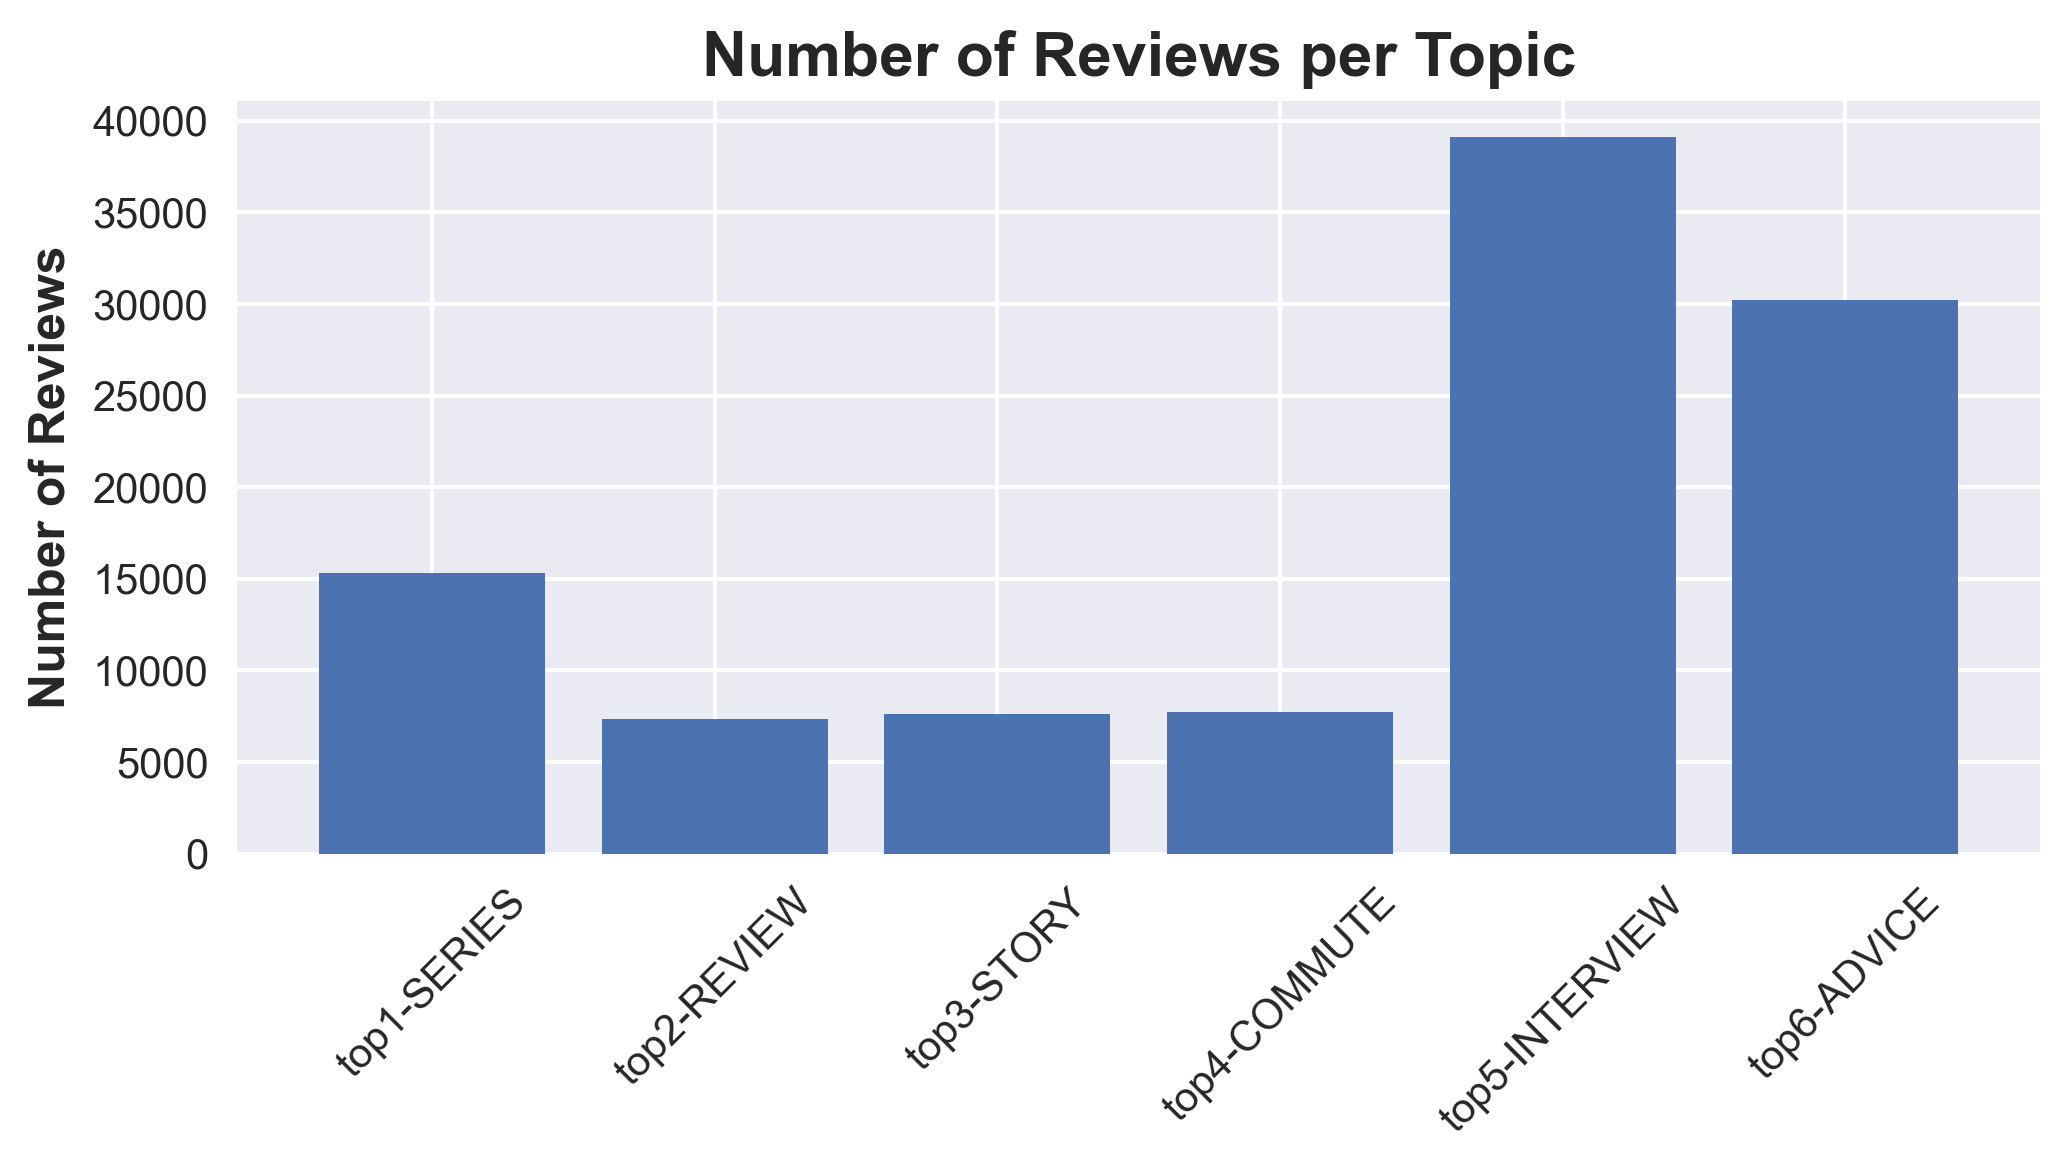

In [19]:
plt.figure(figsize = [7, 4])
plt.rcParams['figure.dpi'] = 300
#change color of every other bar
plt.bar(range(6), docs_count.topic)
plt.title("Number of Reviews per Topic", fontsize = 15, weight = "bold")
plt.ylabel("Number of Reviews", fontsize = 12, weight = "bold")
#plt.xlabel("Topics", fontsize = 12, weight = "bold")
xtick_lab = ["top1-SERIES", "top2-REVIEW", "top3-STORY", "top4-COMMUTE", "top5-INTERVIEW", "top6-ADVICE"]
plt.xticks(range(6), xtick_lab, rotation = 45)
plt.tight_layout();
#plt.savefig("images/number_reviews_topics.svg");

### Visualize reviews topics with t-SNE:

In [20]:
doc_topic2 = docs_topics.to_numpy()
doc_topic2[:6, :]
doc_topic2.shape

(107445, 7)

In [21]:
#sample two thousand reviews*topics from doc_topic (t-SNE takes too long to process all samples)
sample = doc_topic2[np.random.choice(doc_topic2.shape[0], 2000, replace=False), :]
sample[:6, :]

array([[3.33e-02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00],
       [9.00e-04, 1.10e-03, 2.10e-03, 8.00e-04, 3.00e-03, 1.80e-03,
        4.00e+00],
       [2.71e-02, 2.00e-04, 0.00e+00, 5.00e-04, 1.00e-03, 2.00e-04,
        0.00e+00],
       [1.87e-02, 6.00e-04, 1.00e-03, 9.00e-04, 4.60e-03, 2.00e-03,
        0.00e+00],
       [2.00e-04, 1.40e-03, 1.50e-03, 5.00e-04, 3.30e-03, 3.90e-03,
        5.00e+00],
       [0.00e+00, 2.13e-02, 2.00e-04, 0.00e+00, 3.43e-02, 3.40e-03,
        4.00e+00]])

In [22]:
sample2 = sample[:, 0:6]
print(sample2)
target = sample[:, -1]
target[:6]

[[0.0333 0.     0.     0.     0.     0.    ]
 [0.0009 0.0011 0.0021 0.0008 0.003  0.0018]
 [0.0271 0.0002 0.     0.0005 0.001  0.0002]
 ...
 [0.0291 0.0025 0.0023 0.0004 0.0095 0.0102]
 [0.     0.     0.     0.0516 0.     0.    ]
 [0.0001 0.0005 0.     0.0003 0.0021 0.001 ]]


array([0., 4., 0., 0., 5., 4.])

In [23]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=11,verbose=0)
two_dim = model.fit_transform(sample2)

In [53]:
target = target
target_names = np.array(range(6))
target_names

array([0, 1, 2, 3, 4, 5])

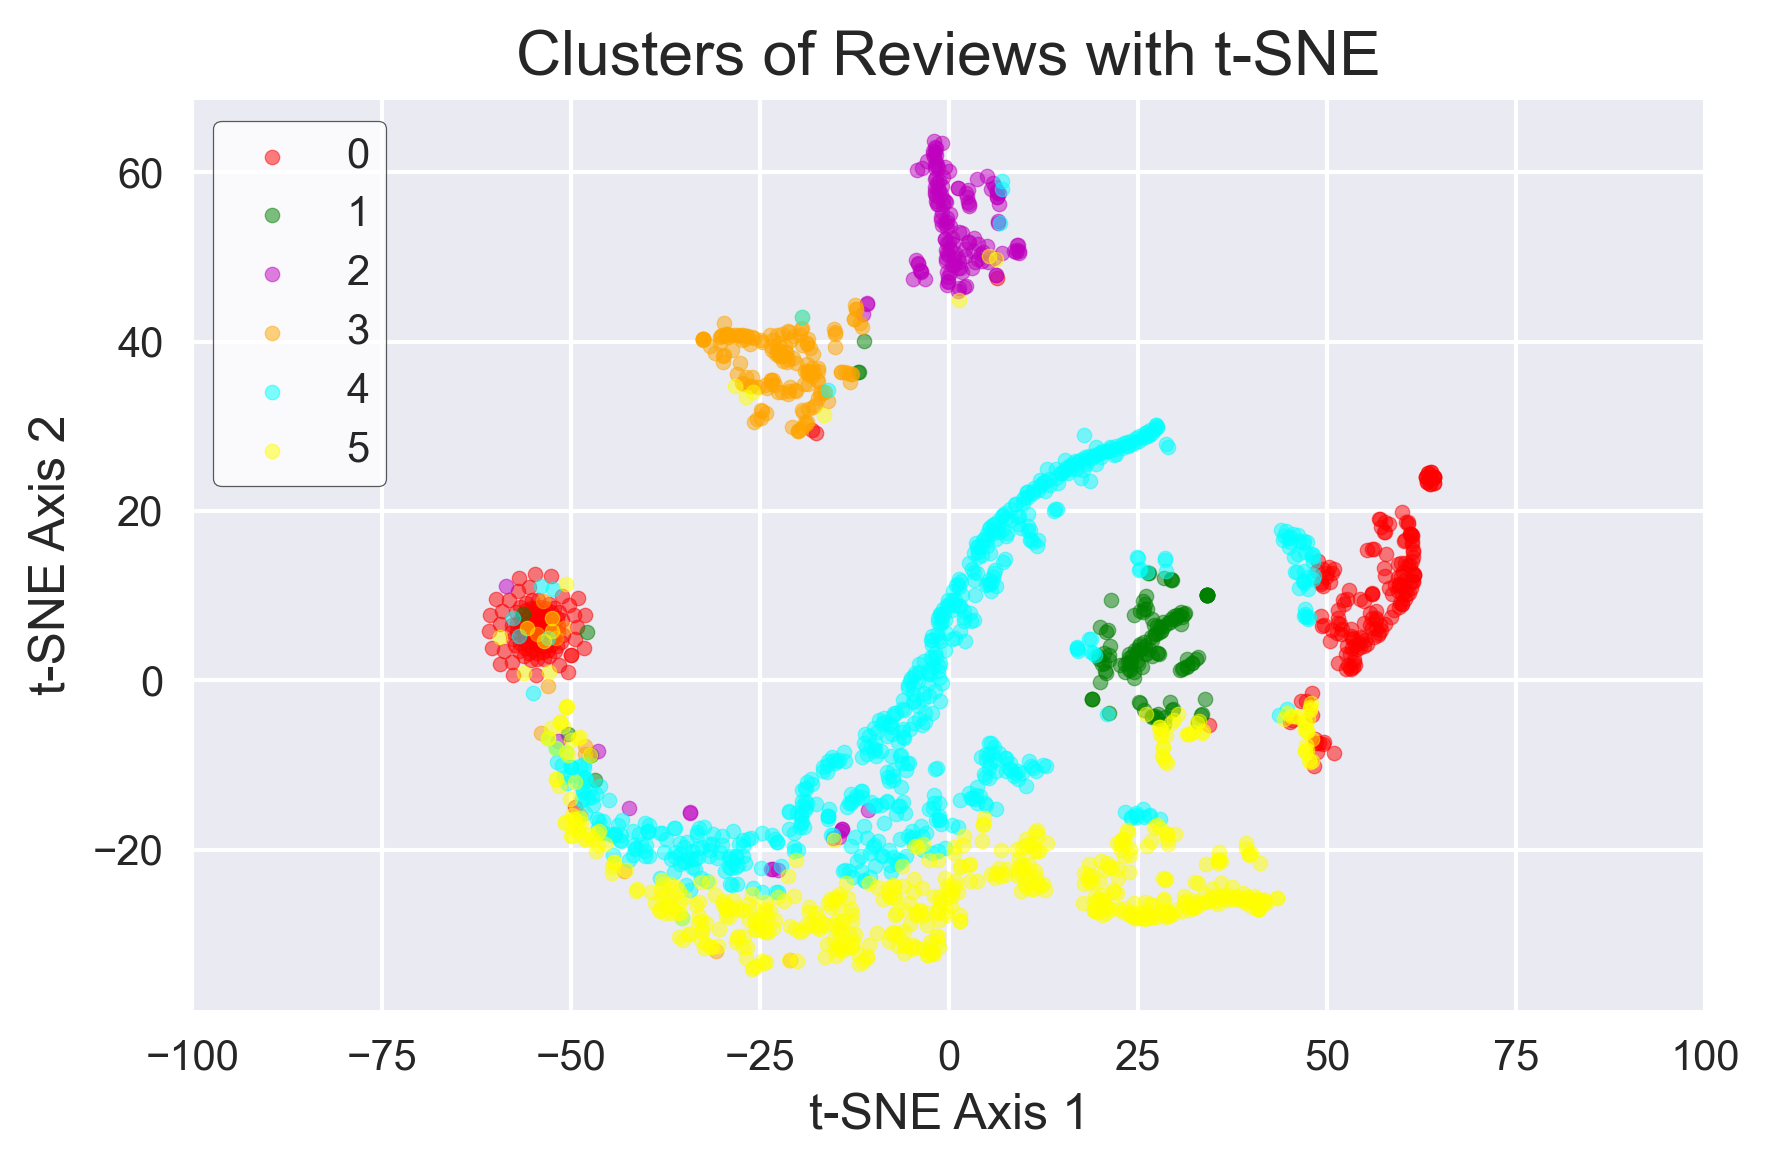

In [54]:
from itertools import cycle
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams['figure.dpi'] = 300

target = target
target_names = np.array(range(6))

colors = cycle(['r','g','m','orange','aqua','yellow'])
target_ids = range(len(target_names))

for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(two_dim[target == i, 0], two_dim[target == i, 1], c=c, label=label, s=12, alpha=0.5)
plt.legend(fontsize=10, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333')
plt.xlim(-100,100);
plt.title("Clusters of Reviews with t-SNE", fontsize=15)
plt.ylabel("t-SNE Axis 2", fontsize=12)
plt.xlabel("t-SNE Axis 1", fontsize=12);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout();
#plt.savefig("images/review_clusters_tSNE.svg");

### Recommending podcasts:

In [24]:
#merge the original dataframe and the document-topic dataframe
df_comb = df_clean.merge(docs_topics, left_index=True, right_index=True)
df_comb.head(3)

,podcast_id,review_title,content,rating,created_at,category,podcast_title,cont_clean,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic
873185,a9bdaba5449189a4587793e36ce4f704,A True Crime Haiku for you,"We listen closely,\nCases of Murder and Loss\nGoing West : True Crime\n\nStella\nPortland, Oregon",5,2019-10-10T15:19:20-07:00,society-culture,Going West: True Crime,we listen closely case of murder and loss going west true crime stella portland oregon,0.0006,0.0007,0.0028,0.001,0.0015,0.0011,2
694914,c699968fd592a60c3ba7333d530907d7,Engaging in my 60's,"Love Adam & Brooke! So true, the generations change, but they do recycle. I love the banter and found the discussion...",5,2018-12-31T04:22:13-07:00,comedy,"Thirty, Flirty, & Dying",love adam brooke so true the generation change but they do recycle i love the banter and found the discussion of bel...,0.0009,0.0012,0.0011,0.001,0.0085,0.0043,4
759771,dcfb90baae108f9938fd3a762b810cc3,Highly recommend!,"Holly and her guests share inspiring and actionable lessons on how to succeed as a leader in business, HR, and life....",5,2017-09-11T07:05:53-07:00,business,Nine To Thrive HR,holly and her guest share inspiring and actionable lesson on how to succeed a a leader in business hr and life highl...,0.0000,0.0000,0.0008,0.000,0.0182,0.0327,5


In [25]:
#spot check review content to better ID topics
read = df_comb[["topic", "rating","content", "podcast_title"]].groupby("topic").head(5)
read

,topic,rating,content,podcast_title
873185,2,5,"We listen closely,\nCases of Murder and Loss\nGoing West : True Crime\n\nStella\nPortland, Oregon",Going West: True Crime
694914,4,5,"Love Adam & Brooke! So true, the generations change, but they do recycle. I love the banter and found the discussion...","Thirty, Flirty, & Dying"
759771,5,5,"Holly and her guests share inspiring and actionable lessons on how to succeed as a leader in business, HR, and life....",Nine To Thrive HR
532244,5,5,I think that anyone who is looking for a perspective into the lives and opinions of Christians of all walks of life ...,Truth Reconstructed
427706,5,5,"People act like the disclaimer was so annoying, it not that serious. I love the podcast.",Crimes of Passion
216941,5,5,"Alexa and Adams have made learning French easy and fun. Their lessons are so easy to follow, the sounds quality is e...",Learn French With Alexa
243706,4,5,"Been dying for a solid general gaming podcast with normal people not trying to play a ""character"" on their podcast. ...",Analog Hole Gaming
432434,4,5,Great job on the 1st Two Podcasts!,Garden & Gun's Whole Hog
794832,4,5,NEW DRAG NAME: Quarantina Aguilera,Drag Her! A RuPaul's Drag Race Podcast
809075,4,5,"This is a fun podcast, Amos has great guests and it's all about his LOVE of comic book fun stuffs.🤓👍🏽",Just Being Amos Podcast


In [26]:
for i in read["content"]:
    print(i, "\n")

We listen closely,
Cases of Murder and Loss
Going West : True Crime

Stella
Portland, Oregon 

Love Adam & Brooke! So true, the generations change, but they do recycle. I love the banter and found the discussion of bell bottoms & record players funny. It brought back memories of my own discussion with my mom as a little girl. I told her she should wear bell bottoms because they're so cool and she said I've been there, done that, and no! I get it now. 😂 

Holly and her guests share inspiring and actionable lessons on how to succeed as a leader in business, HR, and life. Highly recommend listening to Nine to Thrive HR if you want the knowledge AND mindsets to build your best team and grow your business! 

I think that anyone who is looking for a perspective into the lives and opinions of Christians of all walks of life have found a great place to start. I believe that Dave is setting out to show that people from all walks of life with different backgrounds and having varying difficulties

In [27]:
df_rec = df_comb[["podcast_title", "topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6"]]

In [28]:
df_rec = df_rec.groupby(["podcast_title"]).mean()

df_rec.shape
#should have remove any podcasts have non-English title
#df_rec.tail(10)

(19802, 6)

In [29]:
df_rec.loc["Invisibilia"].values

array([0.01282358, 0.00909528, 0.01584151, 0.00682642, 0.0106717 ,
       0.00648868])

In [30]:
df_rec.loc["Invisibilia"]

topic_1    0.012824
topic_2    0.009095
topic_3    0.015842
topic_4    0.006826
topic_5    0.010672
topic_6    0.006489
Name: Invisibilia, dtype: float64

In [60]:
from sklearn.metrics import pairwise_distances

def recommend(str):
    ind = pairwise_distances(df_rec.loc[str].values.reshape(1,-1), df_rec, metric='cosine').argsort()[0][:6]
    return df_rec.index[ind]

In [61]:
for i in df_rec.index:
    if "My Favorite" in i:
        print(i)

Friends With My Favorite Musicians
My Favorite DJ
My Favorite Detective Stories
My Favorite Distraction
My Favorite Murder with Karen Kilgariff and Georgia Hardstark


In [62]:
recommend("Invisibilia")

Index(['Invisibilia', 'Apollo 11: What We Saw', 'Planet Money', 'Slow Burn',
       'Books and Nachos', 'Up and Vanished'],
      dtype='object', name='podcast_title')

### Pull out both nouns and adjetives:

In [63]:
def tag_noun_adj(text_noun):
    """Extracts the nouns and the adjective in a string of text.
       Parameters: string of text
       Returns: string with nouns and adjectives
    """
    noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    nouns_adj = [word for (word, pos) in text_noun if noun_adj(pos)] 
    return " ".join(nouns_adj)

In [64]:
text_tagged["nouns_adjs"] = text_tagged["cont_clean"].apply(tag_noun_adj)
text_tagged.head(3)

,cont_clean,nouns,nouns_adjs
873185,"[(we, PRP), (listen, VBP), (closely, RB), (case, NN), (of, IN), (murder, NN), (and, CC), (loss, NN), (going, VBG), (...",case murder loss crime stella portland oregon,case murder loss west true crime stella portland oregon
694914,"[(love, VB), (adam, NN), (brooke, NN), (so, RB), (true, JJ), (the, DT), (generation, NN), (change, NN), (but, CC), (...",adam brooke generation change banter discussion bell bottom record player memory discussion mom girl i bell bottom t...,adam brooke true generation change banter discussion bell bottom record player memory own discussion mom little girl...
759771,"[(holly, RB), (and, CC), (her, PRP$), (guest, NN), (share, NN), (inspiring, VBG), (and, CC), (actionable, JJ), (less...",guest share lesson leader business hr life hr knowledge mindset team business,guest share actionable lesson leader business hr life recommend hr knowledge mindset best team business


In [65]:
tf_idfna = TfidfVectorizer(stop_words=stop_words)
dtm_tfidfna = tf_idfna.fit_transform(text_tagged["nouns_adjs"])
dtm_tfidfna

<107445x59071 sparse matrix of type '<class 'numpy.float64'>'
	with 1102742 stored elements in Compressed Sparse Row format>

In [67]:
topics_nmf(tf_idfna, dtm_tfidfna, topic=4)

Topic 1: 
 ['great', 'guest', 'job', 'content', 'host', 'work', 'story', 'topic', 'information', 'interview'] 

Topic 2: 
 ['episode', 'new', 'favorite', 'time', 'week', 'topic', 'story', 'life', 'day', 'year'] 

Topic 3: 
 ['good', 'work', 'time', 'story', 'funny', 'day', 'fun', 'life', 'host', 'awesome'] 

Topic 4: 
 ['best', 'life', 'story', 'friend', 'funny', 'time', 'day', 'real', 'world', 'week'] 



In [72]:
#topics_nmf(tf_idfna, dtm_tfidfna, topic=6)
nmf, doc_topic, words = topics_nmf(tf_idfna, dtm_tfidfna, topic=6)

Topic 1: 
 ['great', 'work', 'job', 'content', 'guest', 'host', 'information', 'interview', 'insight', 'topic'] 

Topic 2: 
 ['episode', 'new', 'week', 'season', 'future', 'minute', 'single', 'month', 'wish', 'old'] 

Topic 3: 
 ['good', 'work', 'job', 'laugh', 'content', 'bad', 'information', 'quality', 'day', 'review'] 

Topic 4: 
 ['time', 'funny', 'favorite', 'life', 'fun', 'guest', 'week', 'new', 'topic', 'day'] 

Topic 5: 
 ['best', 'friend', 'world', 'hand', 'year', 'day', 'work', 'heard', 'hilarious', 'crime'] 

Topic 6: 
 ['story', 'interesting', 'true', 'voice', 'crime', 'amazing', 'share', 'history', 'music', 'season'] 



In [69]:
topics_nmf(tf_idfna, dtm_tfidfna, topic=8)

Topic 1: 
 ['great', 'work', 'job', 'content', 'host', 'guest', 'information', 'interview', 'insight', 'chemistry'] 

Topic 2: 
 ['episode', 'new', 'week', 'season', 'minute', 'future', 'single', 'month', 'wish', 'old'] 

Topic 3: 
 ['good', 'work', 'job', 'laugh', 'bad', 'content', 'quality', 'review', 'hard', 'music'] 

Topic 4: 
 ['time', 'life', 'guest', 'day', 'fun', 'week', 'topic', 'real', 'awesome', 'host'] 

Topic 5: 
 ['best', 'friend', 'world', 'hand', 'hilarious', 'heard', 'crime', 'year', 'music', 'work'] 

Topic 6: 
 ['story', 'interesting', 'true', 'crime', 'voice', 'amazing', 'share', 'history', 'music', 'season'] 

Topic 7: 
 ['funny', 'informative', 'interesting', 'entertaining', 'fun', 'smart', 'super', 'host', 'relatable', 'insightful'] 

Topic 8: 
 ['favorite', 'new', 'absolute', 'movie', 'week', 'hilarious', 'hand', 'crime', 'music', 'true'] 



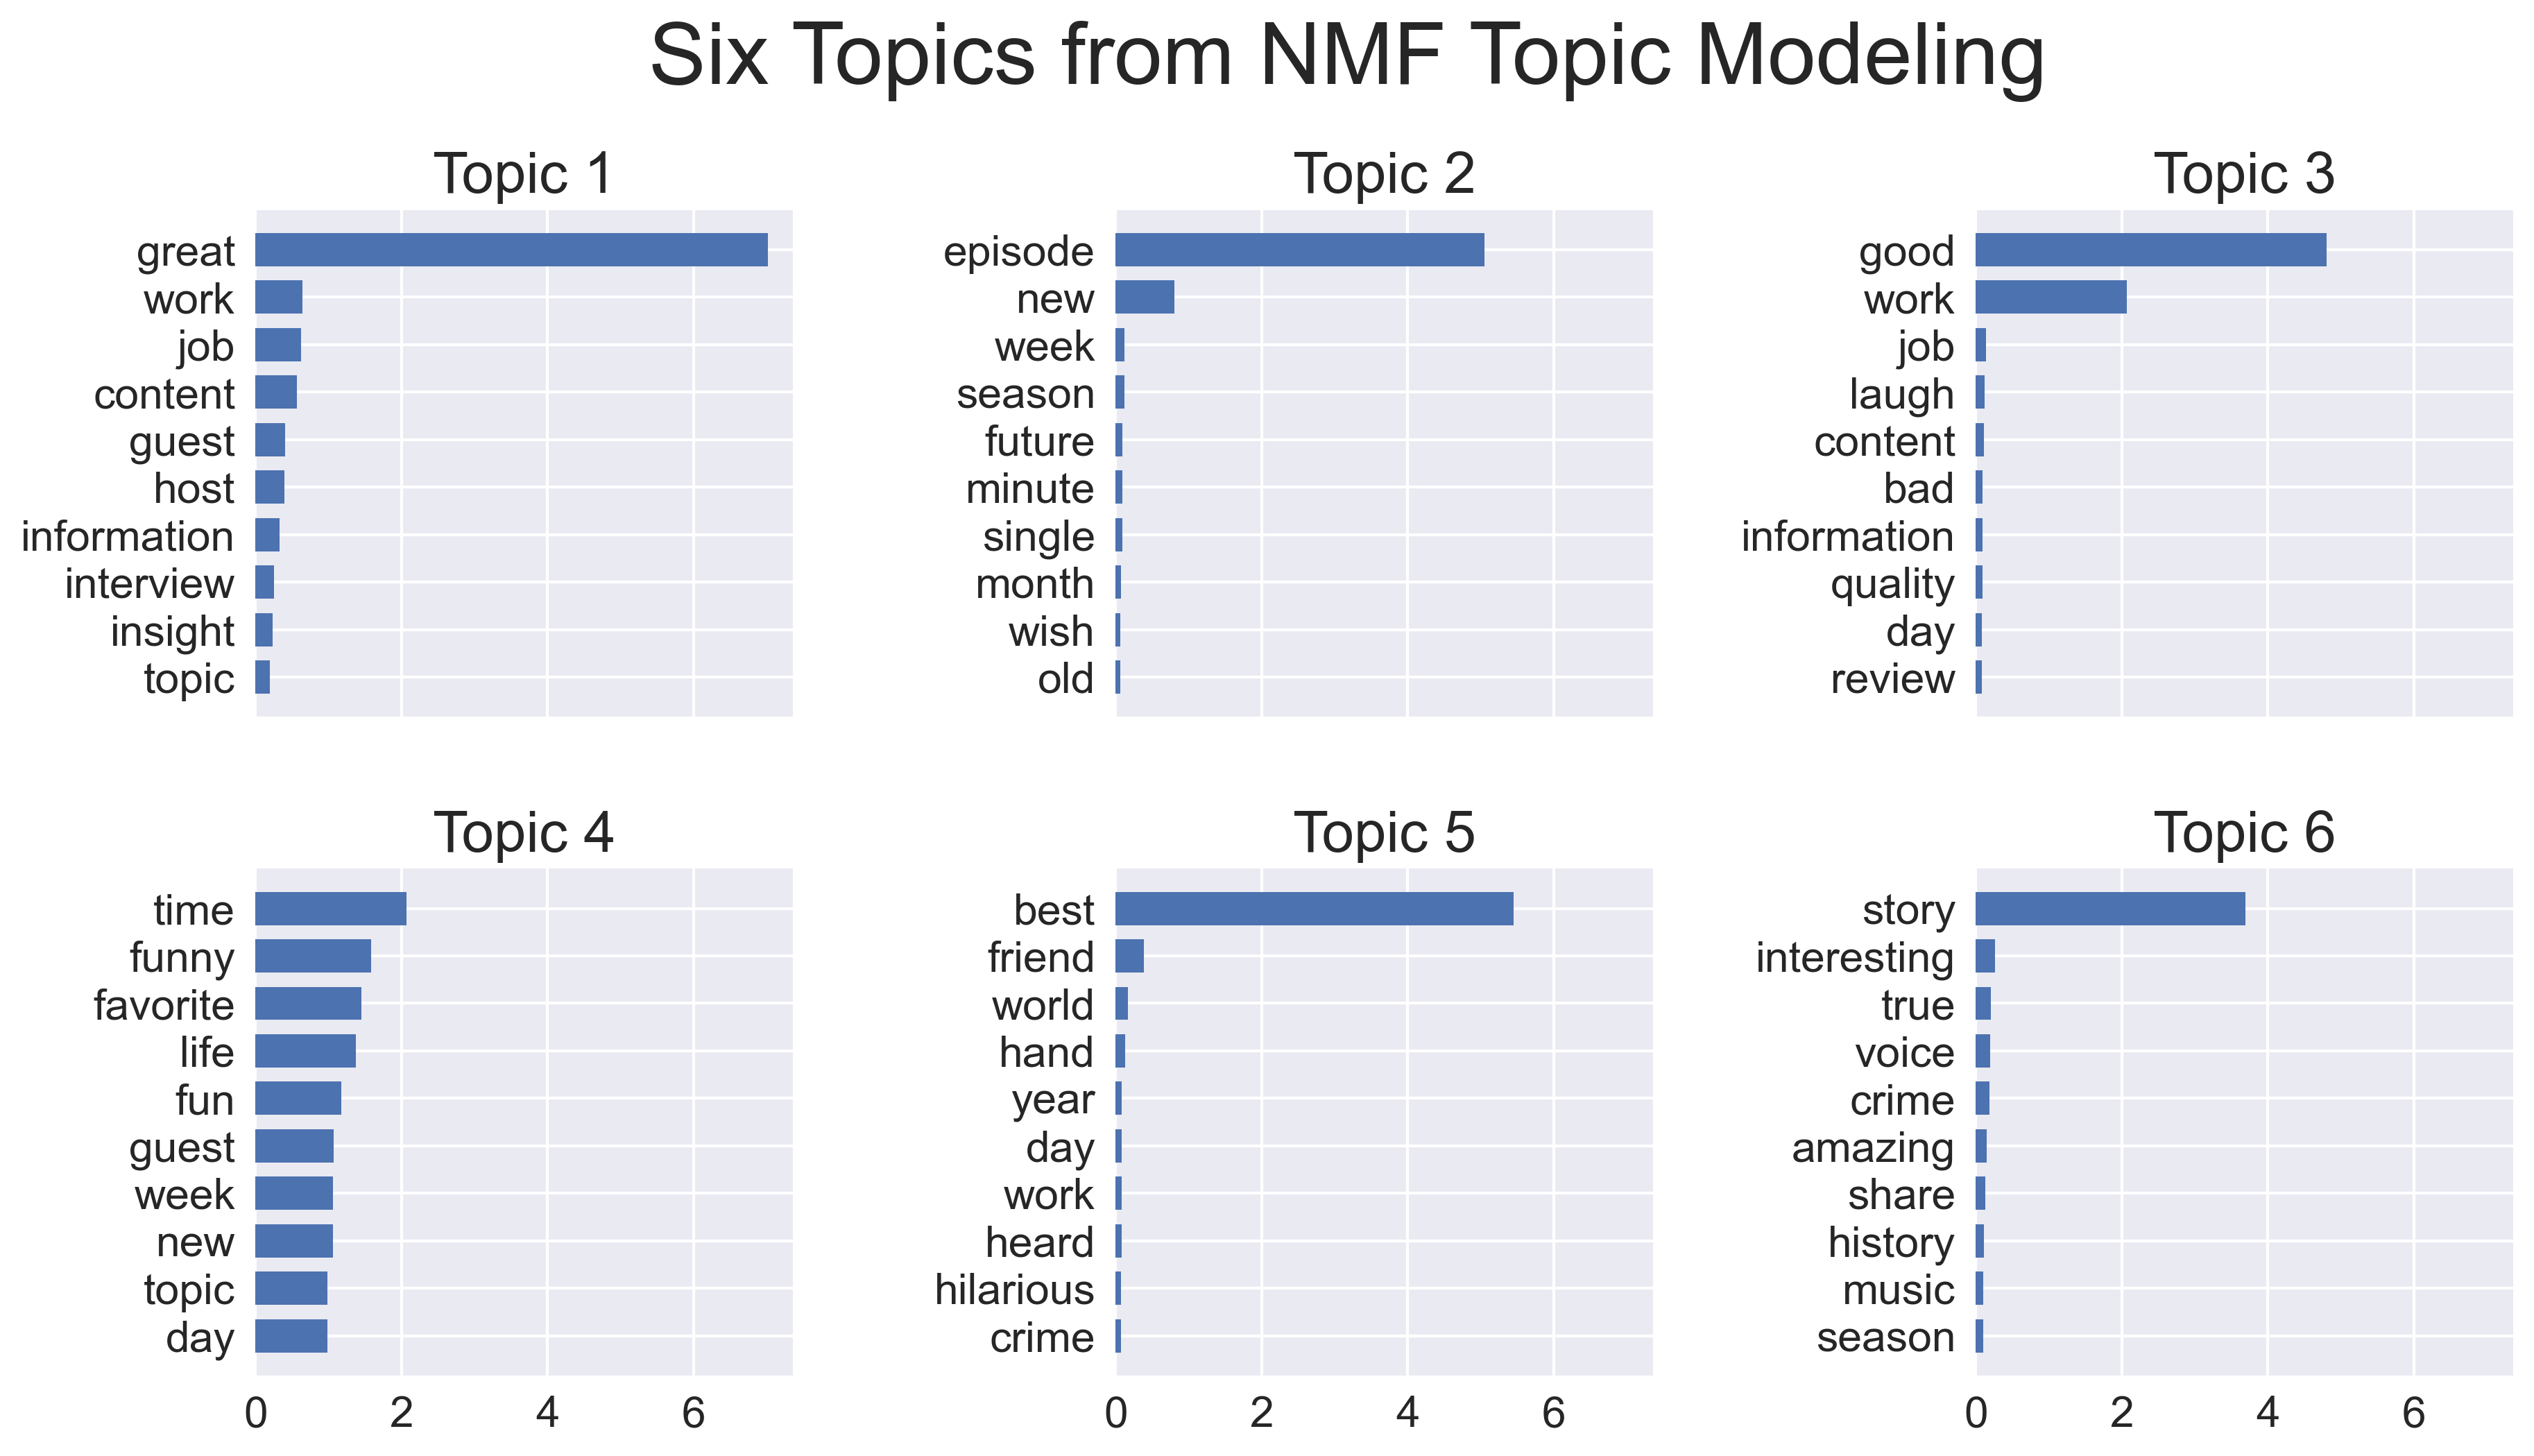

In [73]:
plt.rcParams['figure.dpi'] = 300
fig, axes = plt.subplots(2, 3, figsize=(14, 7), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(nmf.components_):
    top_features_ind = topic.argsort()[:-10 - 1:-1]
    top_features = [words[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',
                 fontdict={'fontsize': 20})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=15)
    for i in 'top right left'.split():
        ax.spines[i].set_visible(False)
    fig.suptitle("Six Topics from NMF Topic Modeling", fontsize=30)

plt.subplots_adjust(top=0.85, bottom=0.05, wspace=0.6, hspace=0.3);
#plt.savefig("images/topics_NMF_noun_adj_6.svg");

### Wordclouds:

In [74]:
df_clean.head(3)

,podcast_id,review_title,content,rating,created_at,category,podcast_title,cont_clean
873185,a9bdaba5449189a4587793e36ce4f704,A True Crime Haiku for you,"We listen closely,\nCases of Murder and Loss\nGoing West : True Crime\n\nStella\nPortland, Oregon",5,2019-10-10T15:19:20-07:00,society-culture,Going West: True Crime,we listen closely case of murder and loss going west true crime stella portland oregon
694914,c699968fd592a60c3ba7333d530907d7,Engaging in my 60's,"Love Adam & Brooke! So true, the generations change, but they do recycle. I love the banter and found the discussion...",5,2018-12-31T04:22:13-07:00,comedy,"Thirty, Flirty, & Dying",love adam brooke so true the generation change but they do recycle i love the banter and found the discussion of bel...
759771,dcfb90baae108f9938fd3a762b810cc3,Highly recommend!,"Holly and her guests share inspiring and actionable lessons on how to succeed as a leader in business, HR, and life....",5,2017-09-11T07:05:53-07:00,business,Nine To Thrive HR,holly and her guest share inspiring and actionable lesson on how to succeed a a leader in business hr and life highl...


In [75]:
#aggregate reviews by rating to see what are the common words used
text_com = pd.DataFrame(df_clean.groupby("rating")["cont_clean"].apply(list).reset_index())
text_com["cont_clean"] = text_com["cont_clean"].apply(lambda x: " ".join(x))

In [76]:
text_com.head()

,rating,cont_clean
0,1,missing a lot of episode keep making the app crash i would give this a zero if i could you can only listen to half o...
1,2,you guy you have such great story to tell please please stop rambling about nothing for minute in between piece of a...
2,3,this second xfile movie i feel is better than the first one in the sense it doe not play on alien abduction theory b...
3,4,i take ap bio and this is a great way to study for it please keep them coming they help so much i really do love the...
4,5,we listen closely case of murder and loss going west true crime stella portland oregon love adam brooke so true the ...


In [78]:
from wordcloud import WordCloud
word_cloud = WordCloud(width = 600, height = 400, stopwords=stop_words, 
                       background_color="white", colormap="Dark2", max_words=100,
                       max_font_size=150, random_state=11)

In [79]:
text_com["cont_clean"][4][:200]

'we listen closely case of murder and loss going west true crime stella portland oregon love adam brooke so true the generation change but they do recycle i love the banter and found the discussion of '

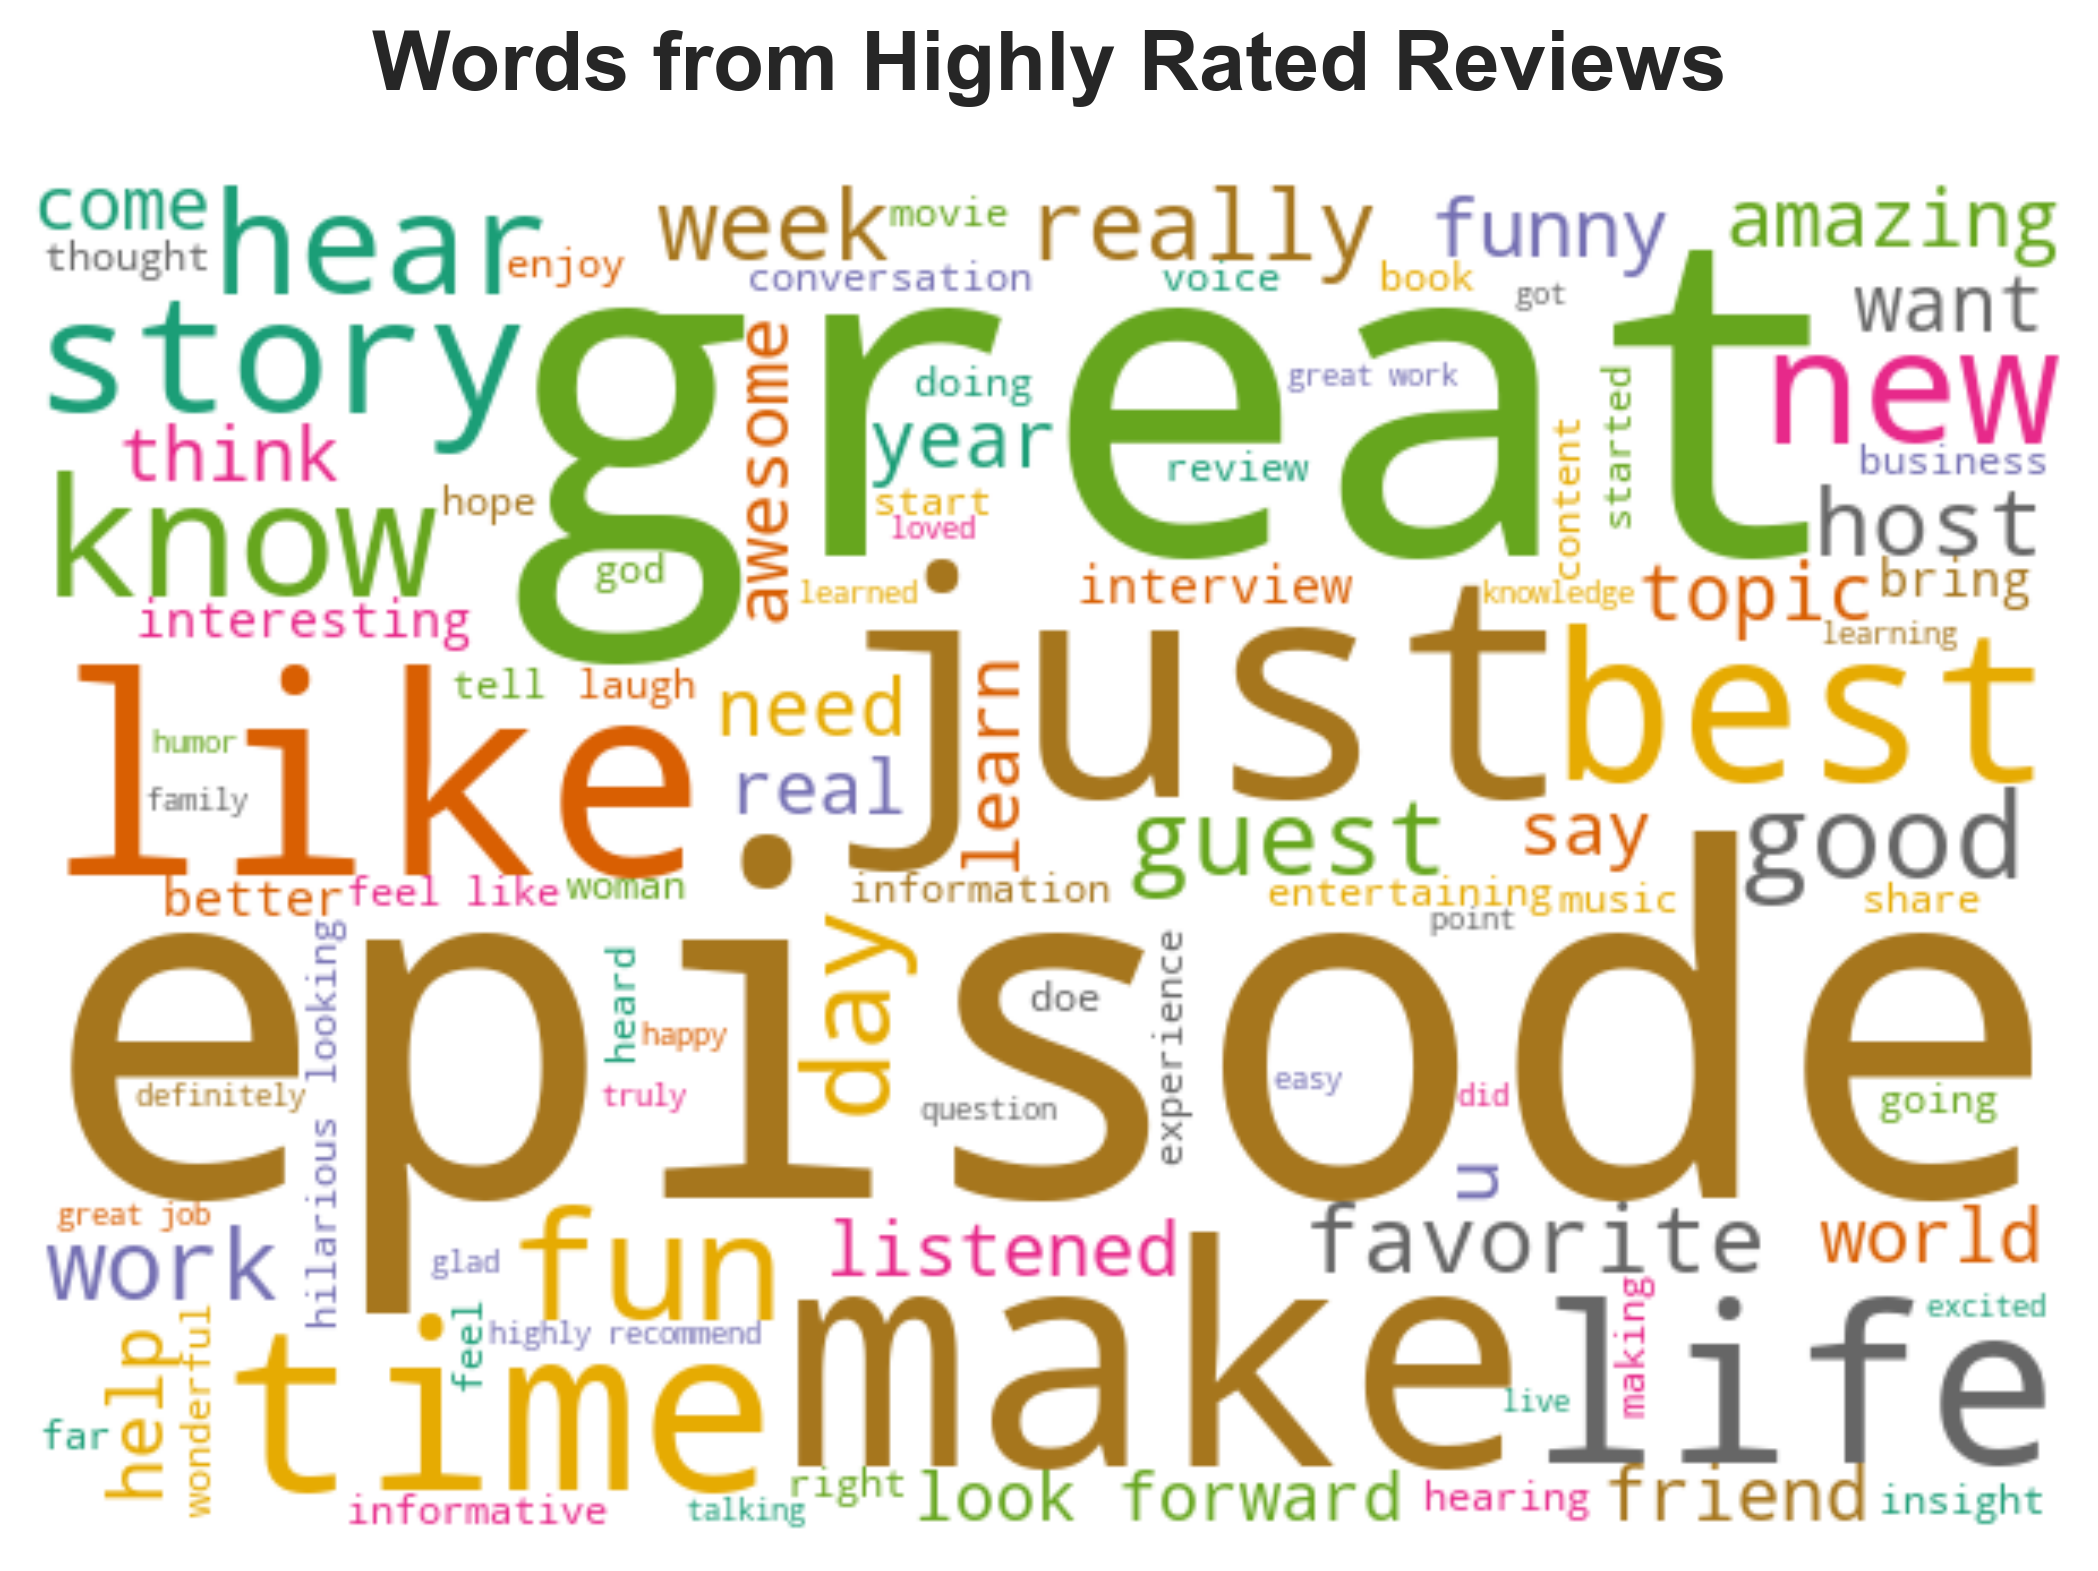

In [80]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams['figure.dpi'] = 300

word_cloud.generate(text_com["cont_clean"][4])
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
#set distance between title and plt with y= argument...small number=big space
plt.title("Words from Highly Rated Reviews", weight="bold", fontsize=20, y=1.05);

#plt.savefig("images/word_cloud_rating5_reviews.svg");